In [ ]:
pip install yfinance

**Pi value**

In [ ]:
import random  # Import the random module to generate random numbers

def estimate_pi(num_samples):  # Define a function to estimate the value of Pi
    inside_circle = 0  # Initialize a counter for points that fall inside the circle

    for _ in range(num_samples):  # Loop over the number of samples
        # Generate random x, y coordinates between -1 and 1
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)
        
        # Check if the point (x, y) lies inside the unit circle
        if x**2 + y**2 <= 1:
            inside_circle += 1  # Increment the counter if the point is inside the circle

    # Estimate Pi using the ratio of points inside the circle to total points
    pi_estimate = (inside_circle / num_samples) * 4
    return pi_estimate  # Return the estimated value of Pi

num_samples = 1000000  # Set the number of random points to generate
pi_estimate = estimate_pi(num_samples)  # Call the function to estimate Pi
print(f"Estimated Pi: {pi_estimate}")  # Print the estimated value of Pi

**Stock Price**

In [ ]:
#importing the necessary module
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# Function to fetch historical stock data
def fetch_stock_data(ticker, start_date, end_date):
    # Download stock data from Yahoo Finance
    data = yf.download(ticker, start=start_date, end=end_date)
    # Return the adjusted closing prices
    return data['Adj Close']

ticker = 'GP'
start_date = '2018-01-01'
end_date = '2024-06-20'

fetch_stock_data(ticker,start_date,end_date)
data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Mean final price after 20 days: $1.05
Possible price range (5th - 95th percentile): $0.69 - $1.51
The price has a 95% chance of not exceeding: $1.51


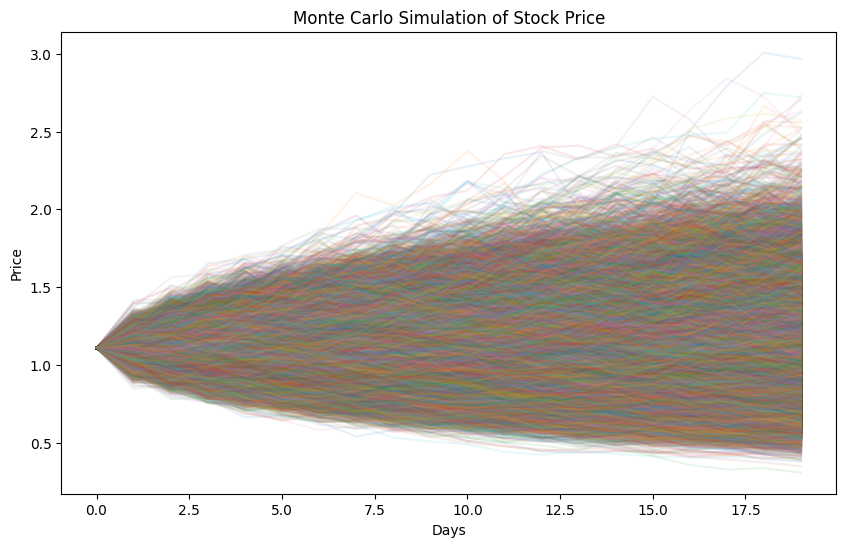

In [12]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt

# Function to fetch historical stock data
def fetch_stock_data(ticker, start_date, end_date):
    # Download stock data from Yahoo Finance
    data = yf.download(ticker, start=start_date, end=end_date)
    # Return the adjusted closing prices
    return data['Adj Close']

# Ticker symbol for the stock
ticker = 'GP'
# Start and end dates for the data
start_date = '2018-01-01'
end_date = '2024-06-20'

# Fetch the stock data
prices = fetch_stock_data(ticker, start_date, end_date)

# Function to calculate log returns
def calculate_log_returns(prices):
    # Calculate daily percentage change
    daily_returns = prices.pct_change()
    # Calculate log returns
    return np.log(1 + daily_returns)

# Function to perform Monte Carlo simulation
def monte_carlo_simulation(log_returns, last_price, days, iterations):
    # Calculate the mean of log returns
    u = log_returns.mean()
    # Calculate the variance of log returns
    v = log_returns.var()
    # Calculate the drift component
    drift = u - (0.5 * v)
    # Calculate the standard deviation of log returns
    stddev = log_returns.std()
    
    # Generate daily return paths
    daily_return_paths = np.exp(drift + stddev * norm.ppf(np.random.rand(days, iterations)))
    
    # Initialize a matrix to hold simulated prices
    price_list = np.zeros((days, iterations))
    # Set the initial price
    price_list[0] = last_price
    
    # Simulate the stock price for each day
    for i in range(1, days):
        price_list[i] = price_list[i-1] * daily_return_paths[i]
    
    # Return the matrix of simulated prices
    return price_list

# Function to analyze the results of the simulation
def analyze_results(price_list, days):
    # Calculate the mean final price
    mean_final_price = np.mean(price_list[-1])
    # Calculate percentiles for the final prices
    percentiles = np.percentile(price_list[-1], [5, 25, 50, 75, 95])
    
    # Print the results
    print(f"Mean final price after {days} days: ${mean_final_price:.2f}")
    print(f"Possible price range (5th - 95th percentile): ${percentiles[0]:.2f} - ${percentiles[4]:.2f}")
    print(f"The price has a 95% chance of not exceeding: ${percentiles[4]:.2f}")
    
    # Return the percentiles
    return percentiles

# Function to plot the simulation results
def plot_simulation(price_list):
    # Set the plot size
    plt.figure(figsize=(10, 6))
    # Plot the simulated price paths
    plt.plot(price_list, alpha=0.1)  # Adjust alpha for better visibility
    # Set the plot title and labels
    plt.title('Monte Carlo Simulation of Stock Price')
    plt.xlabel('Days')
    plt.ylabel('Price')
    # Display the plot
    plt.show()

# Main function to execute the script
def main():
    # Define parameters for the simulation
    ticker = 'GP'
    start_date = '2018-01-01'
    end_date = '2024-06-20'
    simulation_days = 20
    simulation_iterations = 100000
    
    # Fetch stock prices
    prices = fetch_stock_data(ticker, start_date, end_date)
    # Calculate log returns
    log_returns = calculate_log_returns(prices)
    
    # Perform Monte Carlo simulation
    price_list = monte_carlo_simulation(log_returns, prices.iloc[-1], simulation_days, simulation_iterations)
    
    # Analyze the results
    percentiles = analyze_results(price_list, simulation_days)
    
    # Plot the simulation results
    plot_simulation(price_list)

# Run the main function
if __name__ == "__main__":
    main()


In [ ]:
# Install necessary libraries
!pip install -q numpy pandas yfinance scipy matplotlib datetime

import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt

# Function to fetch historical stock data
def fetch_stock_data(ticker, start_date, end_date):
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if data.empty:
            raise ValueError("No data fetched.")
        return data['Adj Close']
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# Function to calculate log returns
def calculate_log_returns(prices):
    daily_returns = prices.pct_change()
    return np.log(1 + daily_returns)

# Function to perform Monte Carlo simulation
def monte_carlo_simulation(log_returns, last_price, days, iterations):
    u = log_returns.mean()
    v = log_returns.var()
    drift = u - (0.5 * v)
    stddev = log_returns.std()

    daily_return_paths = np.exp(drift + stddev * norm.ppf(np.random.rand(days, iterations)))
    price_list = np.zeros((days, iterations))
    price_list[0] = last_price

    for i in range(1, days):
        price_list[i] = price_list[i-1] * daily_return_paths[i]

    return price_list

# Function to analyze the results of the simulation
def analyze_results(price_list, days):
    mean_final_price = np.mean(price_list[-1])
    percentiles = np.percentile(price_list[-1], [5, 25, 50, 75, 95])

    print(f"\nMean final price after {days} days: ${mean_final_price:.2f}")
    print(f"Possible price range (5th - 95th percentile): ${percentiles[0]:.2f} - ${percentiles[4]:.2f}")
    print(f"The price has a 95% chance of not exceeding: ${percentiles[4]:.2f}")

    return percentiles

# Function to plot the simulation results
def plot_simulation(price_list):
    plt.figure(figsize=(10, 6))
    plt.plot(price_list, alpha=0.1)
    plt.title('Monte Carlo Simulation of Stock Price')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.show()

# Main function to execute the script with user input
def main():
    # Input: Stock ticker
    while True:
        ticker = input("Enter stock ticker symbol: ").strip().upper()
        start_date = input("Enter start date (recommend at least 4-5 years earlier, format YYYY-MM-DD): ")
        prices = fetch_stock_data(ticker, start_date, '2024-01-01')
        if prices is not None:
            break
        print("Invalid ticker or data unavailable. Please try again.")

    # Input: Prediction duration
    prediction_date = input("Enter prediction date (format YYYY-MM-DD): ")
    simulation_days = (pd.to_datetime(prediction_date) - prices.index[-1]).days
    if simulation_days <= 0:
        print("Prediction date should be after the last available date. Exiting...")
        return

    # Input: Number of simulations
    simulation_iterations = input("Enter number of simulations (recommend at least 100,000, enter 'default' for 100,000): ")
    if simulation_iterations.lower() == 'default':
        simulation_iterations = 100000
    else:
        simulation_iterations = int(simulation_iterations)
        if simulation_iterations < 1000:
            print("Warning: Low simulation count might reduce accuracy.")

    # Calculate log returns
    log_returns = calculate_log_returns(prices)

    # Perform Monte Carlo simulation
    price_list = monte_carlo_simulation(log_returns, prices.iloc[-1], simulation_days, simulation_iterations)

    # Analyze the results
    percentiles = analyze_results(price_list, simulation_days)

    # Plot the simulation results
    plot_simulation(price_list)

if __name__ == "__main__":
    main()


Enter stock ticker symbol:  GP
Enter start date (recommend at least 4-5 years earlier, format YYYY-MM-DD):  2018-1-1


[*********************100%%**********************]  1 of 1 completed


Enter prediction date (format YYYY-MM-DD):  2024-7-10
Enter number of simulations (recommend at least 100,000, enter 'default' for 100,000):  100000



Mean final price after 194 days: $2.02
Possible price range (5th - 95th percentile): $0.40 - $5.40
The price has a 95% chance of not exceeding: $5.40
